In [1]:
"""
Imports necessary for this notebook
"""
import os 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io as sio
import shdom
from scipy.ndimage import center_of_mass

In [9]:
output_dir = 'experiments/rico52x57x26_velocity_4_3_9img_perspective/dynamic_medium'

a,b,c = shdom.load_dynamic_forward_model(output_dir)
print()
time_list = c.time_list


dv_x = 1.3
dv_y = 3
for medium, time in zip(a.dynamic_medium, time_list):
    grid = medium.grid
    # grid.x += 1e-3 * time * dv_x
    dx = 1e-3 * time * dv_x
    grid.x = np.linspace(grid.xmin + dx, grid.xmax + dx,grid.nx)
    dy = 1e-3 * time * dv_y
    grid.y = np.linspace(grid.ymin + dy,grid.ymax + dy,grid.ny)
   
    grid = medium.scatterers['cloud'].grid
    # grid.x += 1e-3 * time * dv_x
    dx = 1e-3 * time * dv_x
    grid.x = np.linspace(grid.xmin + dx, grid.xmax + dx,grid.nx)
    dy = 1e-3 * time * dv_y
    grid.y = np.linspace(grid.ymin + dy,grid.ymax + dy,grid.ny)
    
    grid = medium.scatterers['cloud'].lwc.grid
    # grid.x += 1e-3 * time * dv_x
    dx = 1e-3 * time * dv_x
    grid.x = np.linspace(grid.xmin + dx, grid.xmax + dx,grid.nx)
    dy = 1e-3 * time * dv_y
    grid.y = np.linspace(grid.ymin + dy,grid.ymax + dy,grid.ny)
    
gt_a,b,c = shdom.load_dynamic_forward_model(output_dir)

In [16]:
min_err = np.inf
# for dv_x in np.arange(-1.5,1.7,0.2):
#     for dv_y in np.arange(-3.5,3.8,0.3):
for dv_x in [1.3]:
    for dv_y in [3]:
        shifted_extinction = []
        for medium, time, gt_medium in zip(a.dynamic_medium,time_list,gt_a):
            extinction = medium.scatterers['cloud'].get_extinction(a.wavelength)
            shift = 1e-3 * time * np.array([dv_x, dv_y, 0])  # km
            
            grid = shdom.Grid(x=np.linspace(extinction.grid.xmin + shift[0], extinction.grid.xmax + shift[0],extinction.grid.nx),
            y=np.linspace(extinction.grid.ymin + shift[1], extinction.grid.ymax + shift[1],extinction.grid.ny), z=extinction.grid.z)
            gt_grid = gt_medium.scatterers['cloud'].grid
            shifted_extinction.append(extinction.resample(grid).data)
            gt_ext = gt_medium.scatterers['cloud'].get_extinction(a.wavelength)
            err_gt = np.linalg.norm((shifted_extinction[-1]-gt_ext.data).reshape(-1,1),ord=1)
            print(np.linalg.norm(err_gt))
        # shifted_extinction = np.stack(shifted_extinction, axis=3)
        err = 0
        for extinction_i in shifted_extinction:
            for extinction_j in shifted_extinction:
                err += np.linalg.norm((extinction_i-extinction_j).reshape(-1,1),ord=1)
        if err < min_err:
            min_err = err
            dv = [dv_x, dv_y, 0]
            

122279.48367072955
193322.82600615607
182150.64351216936
150889.22826535392
0.0
151442.11343918854
172913.11214416916
135332.3610846013


AssertionError: y grid supoprt equally spacing only

In [ ]:
self._scatterer_velocity = [x - y for x, y in zip(self._scatterer_velocity, dv)]
for medium_estimator, time in zip(self._dynamic_medium_estimator, self._time_list):
    grid = medium_estimator.estimators['cloud'].extinction.grid
    grid.x -= 1e-3 *dv[0]*time
    grid.y -= 1e-3 *dv[1]*time
    grid = medium_estimator.grid
    grid.x -= 1e-3 *dv[0]*time
    grid.y -= 1e-3 *dv[1]*time
return dv

In [ ]:
%matplotlib inline
f, axarr = plt.subplots(1, len(images), figsize=(20, 20))
for ax, image in zip(axarr, images):
    ax.imshow(image)
    ax.invert_xaxis() 
    ax.invert_yaxis() 
    ax.axis('off')

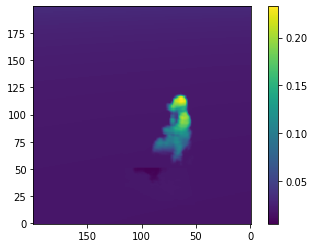

In [8]:
im = images[0]
plt.imshow(im)
plt.gca().invert_yaxis() 
plt.gca().invert_xaxis() 
plt.colorbar()


In [9]:
shdom.save_dynamic_forward_model(output_dir, dynamic_medium, dynamic_solver, measurements)

